# Описательная статистика. Анализ данных с помощью Pandas
автор Д.В.Яценко

## Метрики

In [1]:
import numpy as np
import scipy
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
x=np.random.standard_normal(50)
df = pd.DataFrame(x)

(array([ 2.,  2.,  3.,  6.,  5., 11.,  9.,  6.,  5.,  1.]),
 array([-2.1109179 , -1.70227134, -1.29362478, -0.88497822, -0.47633166,
        -0.0676851 ,  0.34096146,  0.74960802,  1.15825458,  1.56690114,
         1.9755477 ]),
 <BarContainer object of 10 artists>)

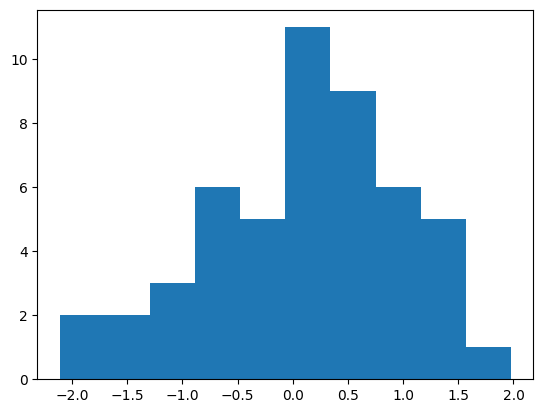

In [3]:
plt.hist(x)

array([[<Axes: title={'center': '0'}>]], dtype=object)

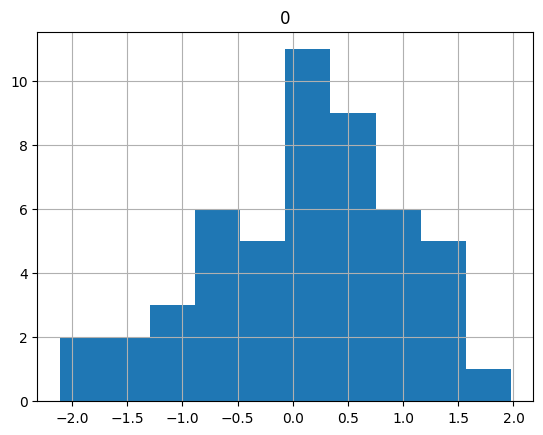

In [4]:
df.hist()

In [11]:
x

array([ 0.59425038,  0.41275802, -0.54743645, -0.32487848, -0.54723526,
       -0.97647001,  0.62442804, -0.47180691,  0.24275402,  0.35123475,
        0.1521802 ,  1.4514146 ,  1.9755477 , -0.71658768,  0.05113766,
       -0.59448191,  0.31045121, -1.44320837,  0.17109815,  0.3615539 ,
        1.54159503, -0.83256103,  0.64771904, -1.73854636,  0.01036288,
        1.08187358, -1.55034698, -0.18218856,  0.75098783, -2.1109179 ,
        0.90694377,  0.26539391,  1.22526494, -0.41649514,  1.32813466,
        0.44793811, -1.278923  ,  0.38720982,  0.1649123 ,  1.29502942,
        0.87194468, -1.09975911,  1.05525294, -0.12797037,  0.17618845,
       -0.78577405,  0.91363875,  0.74583476, -0.05569385,  0.02813167])

In [23]:
df.values.flatten()-x

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [8]:
np.median(x),x.mean(),x.std()

(0.1736433008509584, 0.09483767513903446, 0.8952362161210766)

In [9]:
x.min(),np.percentile(x,25),np.percentile(x,75),x.max()

(-2.1109179000939604,
 -0.528378169329691,
 0.7213058270422424,
 1.9755477031490902)

In [10]:
df[0].median(),df[0].mean(),df[0].std()

(0.1736433008509584, 0.09483767513903446, 0.9043251416899984)

In [ ]:
df[0].min(),df[0].quantile(0.25),df[0].quantile(0.75),df[0].max()

In [ ]:
scipy.stats.iqr(x),np.percentile(x,75)-np.percentile(x,25)

In [ ]:
plt.boxplot(x)

In [ ]:
df.boxplot()

In [ ]:
ax = df.plot.kde()
pd.DataFrame(np.random.standard_normal(100000)).plot.kde(ax=ax)

In [ ]:
print(f" Асимметрия: {df[0].skew()}, Эксцесс: {df[0].kurtosis()}")

## Работа с файлами

In [ ]:
# чтение из URL

In [ ]:
df = pd.read_csv("https://github.com/d-yacenko/data/raw/refs/heads/main/ordinal_data.csv") ## см прошлый семинар по парсингу нестандартного формата дат

In [ ]:
df.head(2)

In [ ]:
!wget https://github.com/d-yacenko/dataset/raw/refs/heads/main/telecom10k/psx_66.2_2024-01-07\ 21:50:00.txt

In [ ]:
# нестандартные текстовые файлы

In [ ]:
df = pd.read_csv("psx_66.2_2024-01-07 21:50:00.txt",delimiter="|",header=1)
df.head(2)

In [ ]:
# Работа с Excel файлом

In [ ]:
df.to_excel('test.xlsx')

In [ ]:
# %pip install fastparquet fastavro pyarrow

In [ ]:
df.to_parquet('test.parquet')

## Приемы аналитики Pandas

Датасет [https://data.mendeley.com/datasets/3t6rbtcms8/1](https://data.mendeley.com/datasets/3t6rbtcms8/1), найти 20 самых активных потребителей интернет 
* Фильтрация
* Группировка
* Union
* Join
* Merge

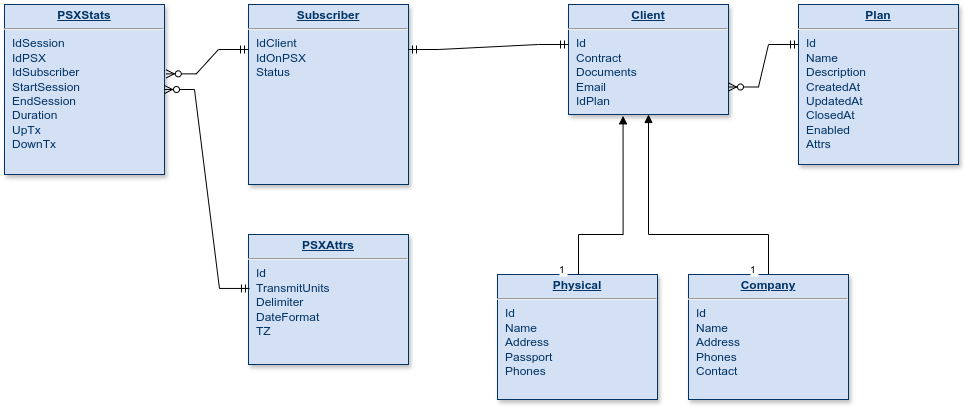

### Union

In [ ]:
!wget https://github.com/d-yacenko/dataset/raw/refs/heads/main/telecom10k/psx_65.0_2024-01-02\ 06:00:00.csv
!wget https://github.com/d-yacenko/dataset/raw/refs/heads/main/telecom10k/psx_65.0_2024-01-02\ 06:10:00.csv
!wget https://github.com/d-yacenko/dataset/raw/refs/heads/main/telecom10k/psx_65.0_2024-01-02\ 06:20:00.csv
!wget https://github.com/d-yacenko/dataset/raw/refs/heads/main/telecom10k/psx_65.0_2024-01-02\ 06:30:00.csv


In [ ]:
df0 = pd.read_csv('psx_65.0_2024-01-02 06:00:00.csv', parse_dates=['StartSession','EndSession'])
df1 = pd.read_csv('psx_65.0_2024-01-02 06:10:00.csv', parse_dates=['StartSession','EndSession'])
df2 = pd.read_csv('psx_65.0_2024-01-02 06:20:00.csv', parse_dates=['StartSession','EndSession'])
df3 = pd.read_csv('psx_65.0_2024-01-02 06:30:00.csv', parse_dates=['StartSession','EndSession'])
df0.shape,df1.shape,df2.shape,df3.shape,

In [ ]:
traffic = pd.concat([df0, df1, df2, df3],axis=0) #ignore_index=True
# traffic.reset_index(drop=True,inplace=True)
print(traffic.shape,sum(traffic.duplicated()))

In [ ]:
traffic.head(2)

### Join

In [ ]:
!wget https://github.com/d-yacenko/dataset/raw/refs/heads/main/telecom10k/client.parquet
!wget https://github.com/d-yacenko/dataset/raw/refs/heads/main/telecom10k/subscribers.csv

In [ ]:
subscribers = pd.read_csv("subscribers.csv")

In [ ]:
subscribers.head(2)

### Фильтрация

In [ ]:
print(subscribers.shape)
subscribers = subscribers[subscribers["Status"]=="ON"]
print(subscribers.shape)

In [ ]:
clients = pd.read_parquet("client.parquet")

In [ ]:
clients.head(2)

### Соединение

In [ ]:
join_clients=pd.merge(subscribers, clients, left_on='IdClient',right_on='Id', how='inner')

In [ ]:
join_clients.head(2)

In [ ]:
join_all=pd.merge(traffic, join_clients, left_on='IdSubscriber',right_on='IdOnPSX', how='left')

In [ ]:
join_all.head(2)

### Группировка

In [ ]:
grouped_all=join_all.groupby("Email").sum(["UpTx","DownTx"])

In [ ]:
grouped_all.head(2)

### Вычисление

In [ ]:
grouped_all["total_traf"]=grouped_all["UpTx"]+grouped_all["DownTx"]

In [ ]:
grouped_all.head(2)

### Сортировка

In [ ]:
grouped_all=grouped_all.sort_values(by="total_traf",ascending=False)

In [ ]:
grouped_all.head(5)

### Срез и график

In [ ]:
grouped_all["total_traf"].iloc[:20].plot.bar()